In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/kaggle/input/porter-delivery-time-estimation-dataset/porter_data.csv")

In [7]:
# Convert timestamps to datetime
df["created_at"] = pd.to_datetime(df["created_at"])
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])

In [8]:
df["delivery_time"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds() / 60

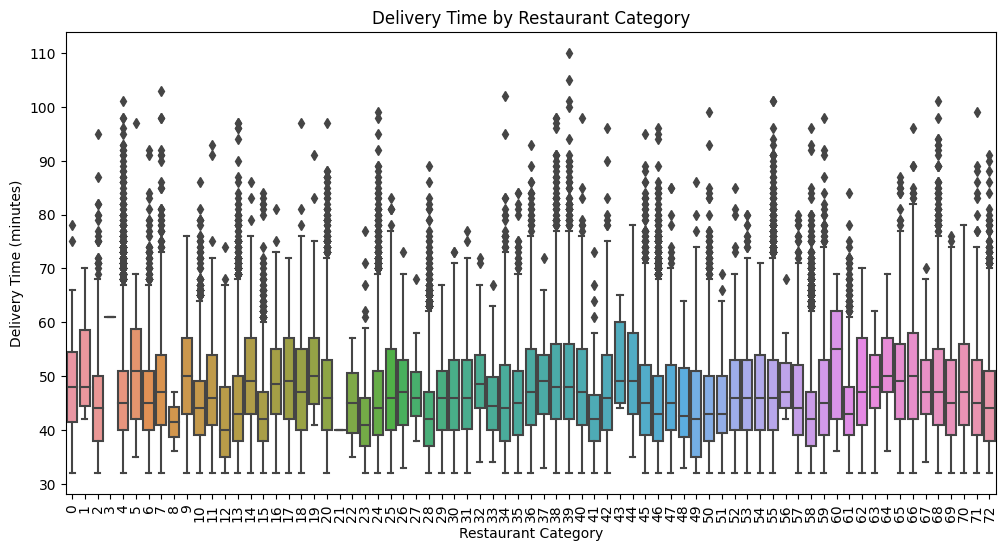

In [12]:
# To compare delivery times across different restaurant types.

plt.figure(figsize=(12, 6))
sns.boxplot(x="store_primary_category", y="delivery_time", data=df)
plt.xticks(rotation=90)
plt.xlabel("Restaurant Category")
plt.ylabel("Delivery Time (minutes)")
plt.title("Delivery Time by Restaurant Category")
plt.show()

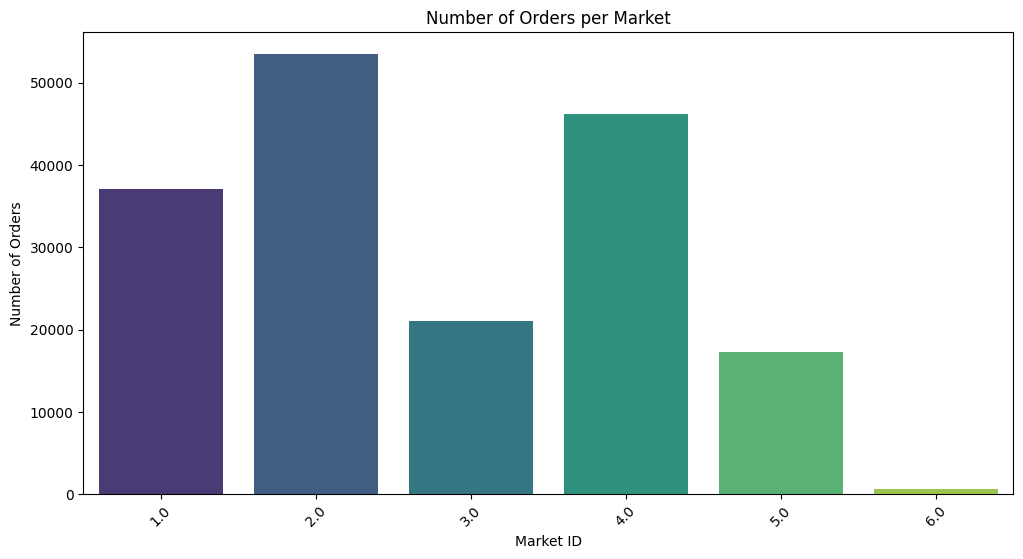

In [14]:
# This helps identify which markets have the highest order volume.

# Count orders per market
market_orders = df["market_id"].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=market_orders.index, y=market_orders.values, palette="viridis")
plt.xlabel("Market ID")
plt.ylabel("Number of Orders")
plt.title("Number of Orders per Market")
plt.xticks(rotation=45)
plt.show()

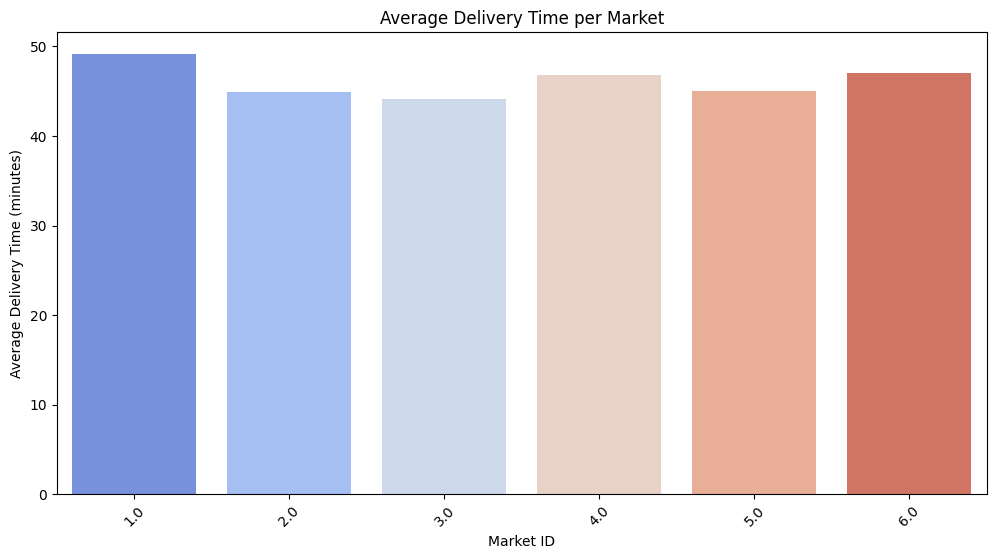

In [15]:
# This shows which markets have faster or slower delivery times.

# Compute average delivery time per market
market_delivery_time = df.groupby("market_id")["delivery_time"].mean().sort_values()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=market_delivery_time.index, y=market_delivery_time.values, palette="coolwarm")
plt.xlabel("Market ID")
plt.ylabel("Average Delivery Time (minutes)")
plt.title("Average Delivery Time per Market")
plt.xticks(rotation=45)
plt.show()

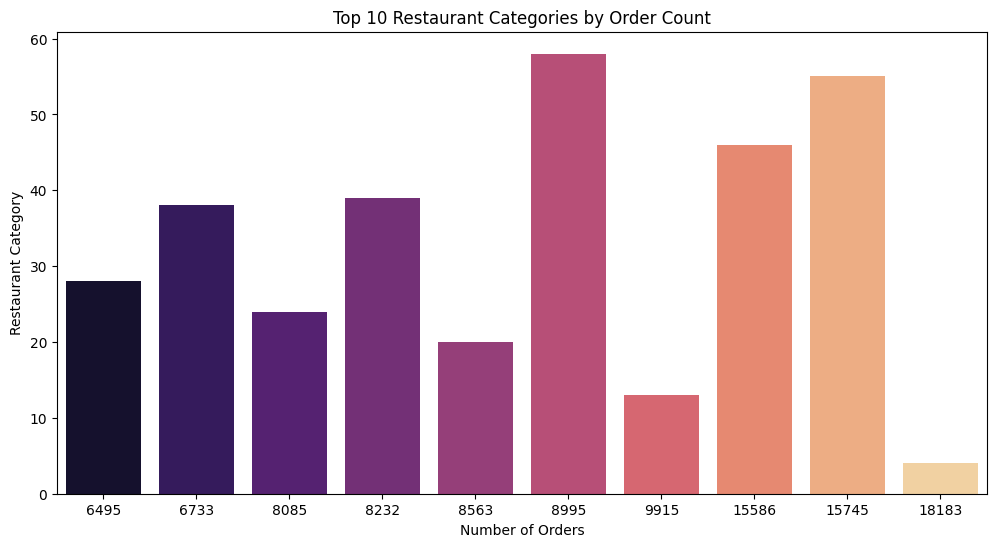

In [16]:
# This shows which restaurant categories are most popular.

# Count orders per restaurant category
category_counts = df["store_primary_category"].value_counts().head(10)  # Top 10 categories

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="magma")
plt.xlabel("Number of Orders")
plt.ylabel("Restaurant Category")
plt.title("Top 10 Restaurant Categories by Order Count")
plt.show()

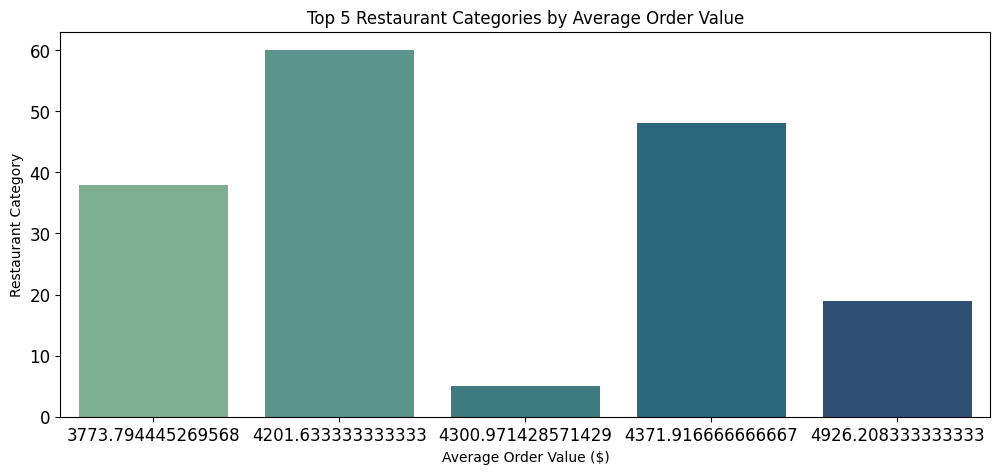

In [21]:
# This helps identify which categories tend to have higher order values.

# Compute average order subtotal per category (Top 5)
category_avg_subtotal = df.groupby("store_primary_category")["subtotal"].mean().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(12, 5))  # Adjusted figure size
sns.barplot(x=category_avg_subtotal.values, y=category_avg_subtotal.index, palette="crest")

# Labels and title
plt.xlabel("Average Order Value ($)")
plt.ylabel("Restaurant Category")
plt.title("Top 5 Restaurant Categories by Average Order Value")

# Adjust spacing
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

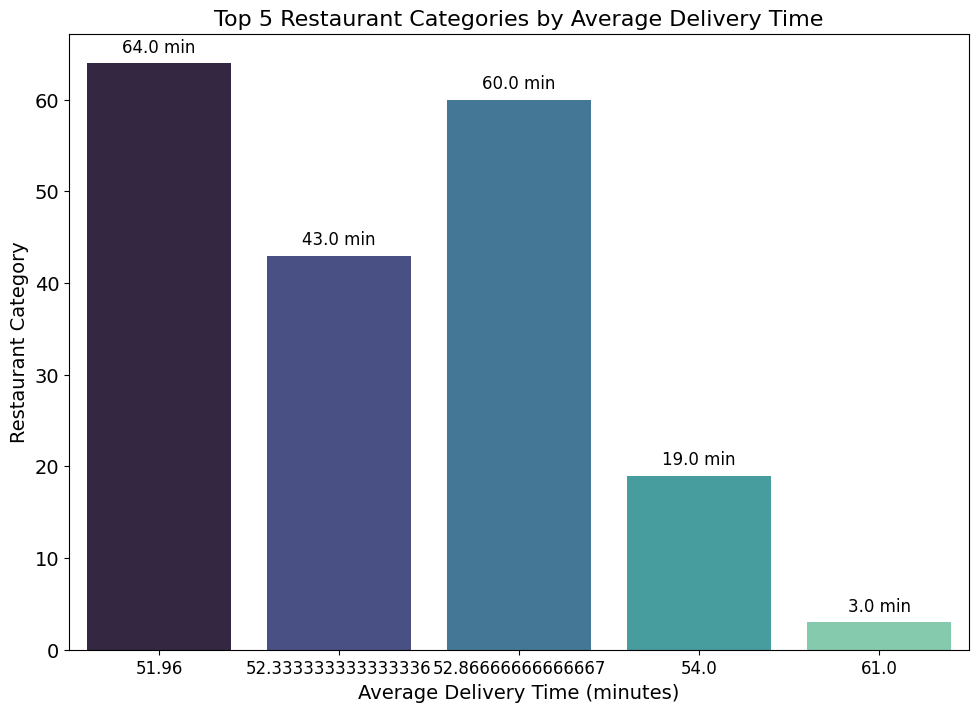

In [25]:
#This will help understand which restaurant categories have longer delivery times.

# Convert timestamps to datetime
df["created_at"] = pd.to_datetime(df["created_at"])
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])

# Compute delivery time in minutes
df["delivery_time"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds() / 60

# Compute average delivery time per category (Top 5)
category_avg_delivery = df.groupby("store_primary_category")["delivery_time"].mean().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=category_avg_delivery.values, y=category_avg_delivery.index, palette="mako")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f min", padding=5, fontsize=12)

plt.xlabel("Average Delivery Time (minutes)", fontsize=14)
plt.ylabel("Restaurant Category", fontsize=14)
plt.title("Top 5 Restaurant Categories by Average Delivery Time", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.subplots_adjust(left=0.3)
plt.show()

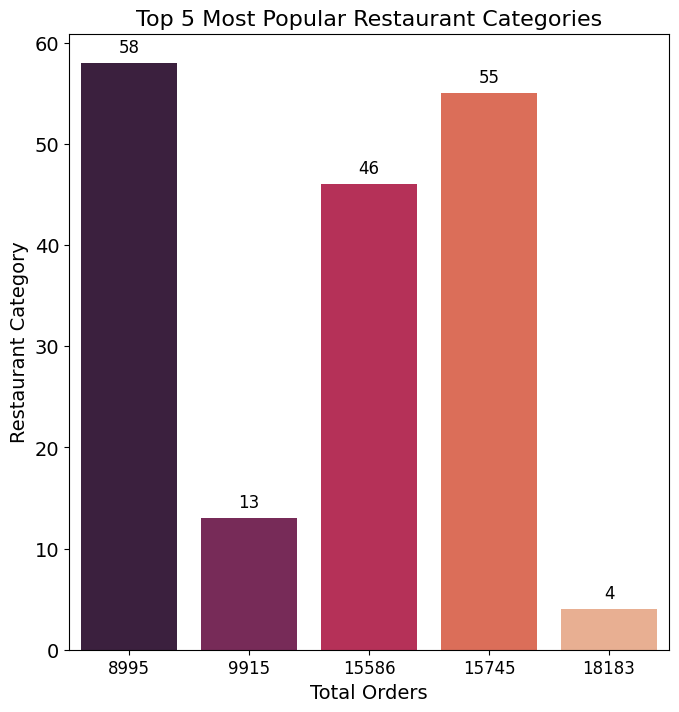

In [26]:
# This will show which restaurant categories receive the highest number of orders.

# Count number of orders per category (Top 5)
category_order_count = df["store_primary_category"].value_counts().head(5)

# Plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=category_order_count.values, y=category_order_count.index, palette="rocket")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt="%d", padding=5, fontsize=12)

plt.xlabel("Total Orders", fontsize=14)
plt.ylabel("Restaurant Category", fontsize=14)
plt.title("Top 5 Most Popular Restaurant Categories", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.subplots_adjust(left=0.3)
plt.show()

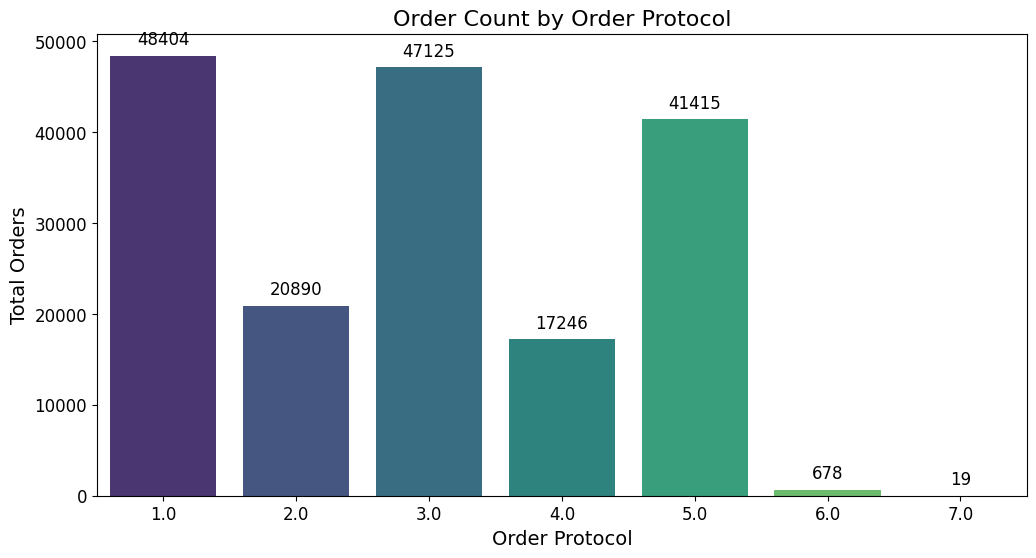

In [28]:
# This shows how orders are typically placed (e.g., app, call, prebooking).

# Count number of orders per protocol
order_protocol_count = df["order_protocol"].value_counts()

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=order_protocol_count.index, y=order_protocol_count.values, palette="viridis")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt="%d", padding=5, fontsize=12)

plt.xlabel("Order Protocol", fontsize=14)
plt.ylabel("Total Orders", fontsize=14)
plt.title("Order Count by Order Protocol", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()